Analyzing-Crimes-in-Los-Angeles

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read crimes.csv file

In [7]:
crimes = pd.read_csv(r"C:\Users\Jamaica\Desktop\Kian's File\Personal file\Projects\Analyzing Crimes in Los Angeles\crimes.csv", dtype={"TIME OCC": str})

Analyze Data

In [25]:
#crimes.shape
#crimes.describe
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

Highest frequency of crimes

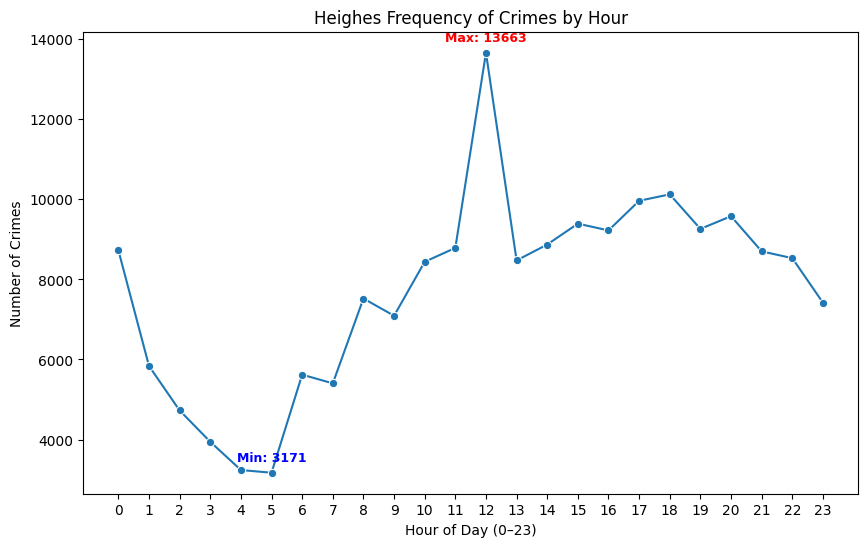

In [60]:
# Convert TIME OCC to integers
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)

# Extract the hour (0–23)
crimes['crime_hour'] = crimes['TIME OCC'] // 100  

# Count crimes per hour
crime_counts = crimes['crime_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=crime_counts.index, y=crime_counts.values, marker="o")

# Find highest and lowest
max_idx = crime_counts.idxmax()
max_val = crime_counts.max()
min_idx = crime_counts.idxmin()
min_val = crime_counts.min()

# Annotate only highest and lowest
ax.text(max_idx, max_val+200, f"Max: {max_val}", ha="center", va="bottom", fontsize=9, color="red", fontweight="bold")
ax.text(min_idx, min_val+200, f"Min: {min_val}", ha="center", va="bottom", fontsize=9, color="blue", fontweight="bold")

plt.xticks(range(0,24))
plt.title("Heighes Frequency of Crimes by Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crimes")
plt.show()

Top LAPD Area for Night Crimes

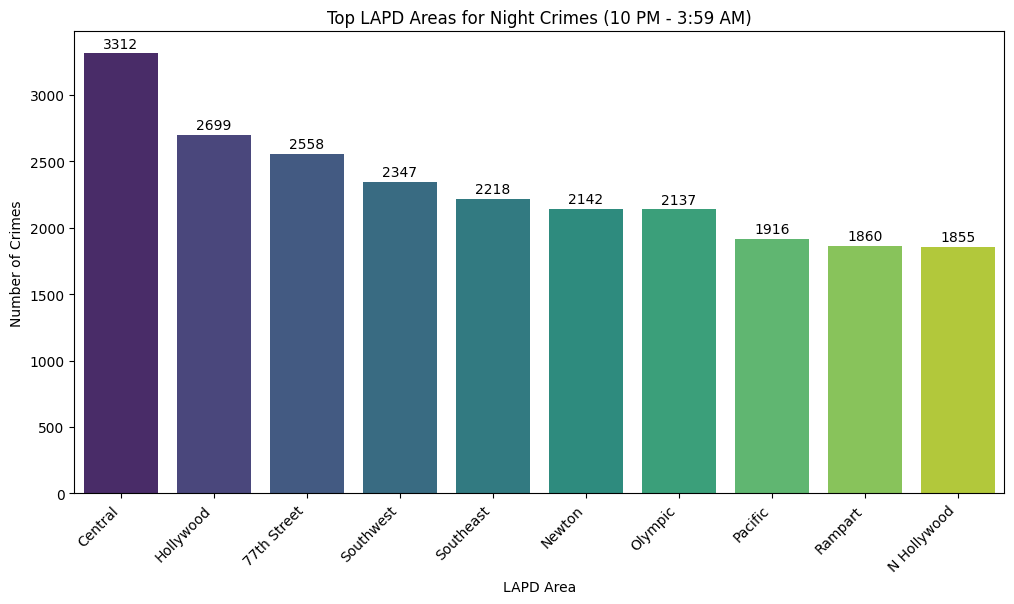

In [57]:
# Filter crimes between 10 PM – 3 AM
crimes_night = crimes[(crimes["crime_hour"] >= 22) | (crimes["crime_hour"] <4)]

# Group by area
crimes_area = crimes_night.groupby("AREA NAME").size().reset_index(name="crime_count")
crimes_area = crimes_area.sort_values("crime_count", ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=crimes_area, x="AREA NAME", y="crime_count", palette="viridis", hue="AREA NAME", legend=False)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xticks(rotation=45, ha="right")

plt.title("Top LAPD Areas for Night Crimes (10 PM - 3:59 AM)")
plt.xlabel("LAPD Area")
plt.ylabel("Number of Crimes")
plt.show()

Crimes by Victim Age Group

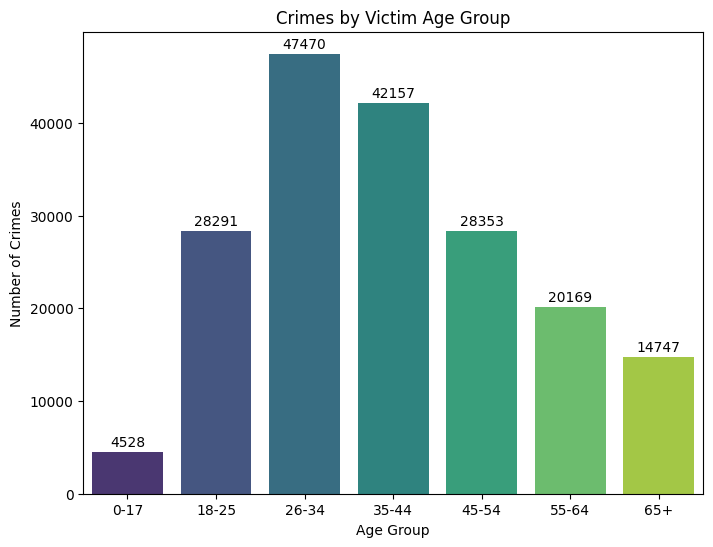

In [81]:
# Define age groups
bins = [0, 18, 26, 35, 45, 55, 65, 100]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["age_group"] = pd.cut(crimes["Vict Age"], bins=bins, labels=labels, right=False)

# Group by age group
df_age = crimes.groupby("age_group", observed=True).size().reset_index(name="crime_count")

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_age, x="age_group", y="crime_count", palette="viridis", hue="age_group", legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)
plt.title("Crimes by Victim Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.show()


Simplified Version:

In [45]:
# Ensure TIME OCC is string with 4 digits (e.g., "0930", "2200")
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4)

# Highest frequency of crimes (hour only)
peak_crime_hour_1 = crimes['TIME OCC'].str[:2].mode()[0]   # e.g., "22"
peak_crime_hour = int(peak_crime_hour_1)                   # convert to int
print("Peak crime hour:", peak_crime_hour)

# Filter crimes between 10 PM and 4 AM
crimes['Hour'] = crimes['TIME OCC'].str[:2].astype(int)
crimes_10_4 = crimes[(crimes['Hour'] >= 22) | (crimes['Hour'] <= 4)]

# Group by AREA NAME for night crimes
crimes_area = crimes_10_4.groupby('AREA NAME').size().sort_values(ascending=False)
peak_night_crime_location = crimes_area.index[0]
print("Top area for night crimes:", peak_night_crime_location)

# Victim Age Groups
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 18, 26, 35, 45, 55, 65, 100]

crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=False)
victim_ages = crimes['Age Bracket'].value_counts().sort_index()
print(victim_ages)


Peak crime hour: 12
Top area for night crimes: Central
Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64
